#### Student: Chen Weiyi, weiyi.alan.chen@gmail.com

# MTH9879 Homework 8

Assigned: April 14, 2015.
Due: April 28, 2015 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Yu Gan (yugan323@gmail.com), Fubo Shi (fubo.shi.baruch@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TAs Yu Gan and/or Fubo Shi.


### 0. (0 points) 
Read Section 6.7 of Bouchaud, Farmer and Lillo.

## Predictability of order flow

### 1. (6 points)

Suppose that the distribution of meta order sizes $Q$ is exponential so that

$$
\Pr(Q>V)= \frac{1}{\lambda}\,e^{-\lambda\,V}
$$

Assuming slices of  constant size $\bar v$, compute the conditional probability that a hidden order has more slices given that $n$ slices have already been observed.  Compare your result with the case where distribution of metaorder size is power-law.

<font color="darkblue">

### Solution

The conditional probability that a hidden order has more slices given that n slices have already been observed, 

\begin{equation}
    q_t = \left.\Pr(T \geq t+1 \right|T \ge t) = \frac{\Pr(T \ge t+1)}{\Pr(T \ge t)} = e^{-\lambda}
\end{equation}

If distribution of metaorder size is power-law, then similary (from lecture note)

\begin{equation}
    q_t = \left.\Pr(T \geq t+1 \right|T \ge t) = \frac{\Pr(T \ge t+1)}{\Pr(T \ge t)} \sim \left(\frac{t}{t+1}\right)^\lambda
\end{equation}
    

## Price manipulation

### 2. (10 points)

Consider the price process

$$
S_t=S_0+\int_0^t\,f(\dot{x}_s)\,G(t-s)\,ds+\int_0^t\,\sigma\,dZ_s
$$

where ${\dot x}_s$ is the rate of trading in dollars at time $s < t$, $f(\dot{x}_s)$ represents the impact of trading at time $s$ and $G(t-s)$ is a decay factor.

(a) With the choices

$$
f(v)=\sqrt{v},\quad G(\tau)=\frac{1}{1+\tau},
$$
    
repeat the computations in Lecture 8  to derive an expression for the expected cost of accumulating shares at the rate $v_1$ and liquidating them at the rate $v_2$.

<font color="darkblue">

### Solution

From lecture note equation (7), and given the conditions 

$$
f(v)=\sqrt{v},\quad G(\tau)=\frac{1}{1+\tau},
$$

we have

\begin{eqnarray*}
C_{11}&=&v_1\,f\left(v_1\right)\,\int_0^{\theta\,T}\,dt\,\int_0^t\,G(t-s)\,ds  =v_1^{3/2}\int_0^{\theta\,T}\,dt\,\int_0^t\,\frac{1}{1+t-s}\,ds &=& v_1^{3/2}(1+\theta\,T)\ln(1+\theta\,T) - v_1^{3/2}\theta\,T 
\end{eqnarray*}

Similarly,

\begin{eqnarray*}
C_{22} &=& v_2^{3/2}(1+T-\theta\,T)\ln(1+T-\theta\,T) + v_2^{3/2}(\theta\,T-T)\nonumber\\
C_{12} &=& v_2\,\sqrt v_1\, \left[(1+T)\ln(1+T) - (1+\theta\,T) \ln(1+\theta\,T) - (1+T-\theta\,T)\ln(1+T-\theta\,T)\right]
\end{eqnarray*}

(b) Verify that with $T=1$, $v_1=1/4$, $v_2=1$, the expected cost of this round-trip strategy is negative, thus demonstrating that price manipulation is possible. (Recall from the lecture slides that price manipulation is always possible if $f(\cdot)$ is nonlinear and the decay kernel $G(\cdot)$  is finite at the origin.)

Hint: You might consider using Mathematica or Wolfram Alpha to do the integrations.

<font color="darkblue">

### Solution

In [1]:
import math

v_1   = 1. / 4.
v_2   = 1.
T     = 1.
theta = v_2 / (v_1 + v_2)

C_11 = v_1**(1.5) * (1 + theta*T) * math.log(1+theta*T) - v_1**(1.5) * theta * T
C_22 = v_2**(1.5) * (1 + T - theta*T) * math.log(1+T-theta*T) + v_2**(1.5) * (theta*T - T)
C_12 = v_2 * v_1**0.5 * ((1+T)*math.log(1+T) - (1+theta*T)*math.log(1+theta*T) - (1+T-theta*T)*math.log(1+T-theta*T))
C    = C_11 + C_22 - C_12 

print 'C_11:\t', C_11
print 'C_22:\t', C_22
print 'C_12:\t', C_12
print 'C:\t'   , C
print 'C pos?:', (C > 0)

C_11:	0.032251999603
C_22:	0.0187858681527
C_12:	0.0547462480717
C:	-0.00370838031594
C pos?: False


### Set up R environment

In [2]:
%load_ext rpy2.ipython

## The Obizhaeva-Wang model

### 3. (8 points)

In the Obizhaeva-Wang (OW) model, the price follows

$$
S_t=S_0+\eta\,\int_0^t\,{\dot x}_s\,e^{-\rho\,(t-s)}\,ds+\int_0^t\,\sigma\,dZ_s
$$

(a) Derive an expression for the expected price path corresponding to a VWAP execution.


<font color="darkblue">

### Solution

For a VWAP exection, we have given condition 

$${\dot x} = \frac{x}{T}$$

Then
$$
S_t=S_0+\eta\,\int_0^t\,{\frac{x_s}{T_s}}\,e^{-\rho\,(t-s)}\,ds+\int_0^t\,\sigma\,dZ_s
$$

When $0 \leq t \leq T$,

$$
\mathbb{E}[S_t] = S_0 + \eta \frac{x}{T} \int_0^t e^{-\rho(t-s)}ds = S_0 + \frac{\eta x}{\rho T}(1-e^{-\rho t})
$$


But if $t > T$, 
$$
\mathbb{E}[S_t] = \mathbb{E}[S_T] = S_0 + \frac{\eta x}{\rho T}(1 - e^{-\rho T})
$$




(b) With the duration $T$ of the meta order set to 1, plot the expected price path from time $t=0$ to time $t=2$ for $\rho=0.5,1,$ and $2$.

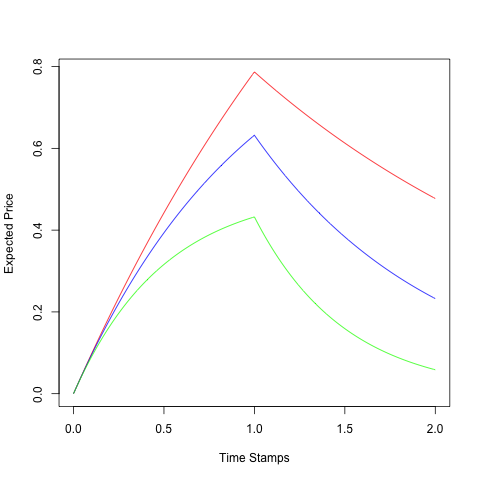

In [3]:
%%R

# Initialize Paramters
ls_timeStamps = seq(0,2,0.01)
f_rho1 = 0.5
f_rho2 = 1
f_rho3 = 2

# function to generate expected price path
expectedPrice = function(t,f_rho){
    ls_price = (1-exp(-f_rho*t)) / f_rho;
    if (t > 1){
        ls_price = exp(f_rho*(1-t))/f_rho - exp(f_rho*(-t))/f_rho;
    }
    return (ls_price)
}

# apply defined function for different rho
S_1 = sapply(ls_timeStamps, function(t)expectedPrice(t, f_rho1))
S_2 = sapply(ls_timeStamps, function(t)expectedPrice(t, f_rho2))
S_3 = sapply(ls_timeStamps, function(t)expectedPrice(t, f_rho3))

# plot
plot(ls_timeStamps, S_1, type='l', xlab='Time Stamps', ylab='Expected Price', col='red')
points(ls_timeStamps, S_2, type='l', col='blue')
points(ls_timeStamps, S_3, type='l', col='green')

(c) What is the expected average cost per share $\bar S_T$ of a VWAP order in the OW model?

<font color="darkblue">

### Solution

According to lecture note, the expected average cost is

$$\bar S_T= \frac{C[\Pi]}{x} = \frac{1}{x} \int_0^T\,{\dot x}_t\,dt\,\int_0^t\,\dot x e^{-\rho\,(t-s)}ds$$

If indicated in part (a) with $\dot x = \frac{x}{T}$, we have 

$$C[\Pi] = \frac{\eta\,x^2}{\rho\,T} + \frac{\eta\,x^2}{\rho^2\,T^2}\,(e^{-\rho\,T}-1)$$

Therefore,

$$\bar S_T = \frac{\eta\,x}{\rho\,T} + \frac{\eta\,x}{\rho^2\,T^2}\,(e^{-\rho\,T}-1)$$